In [3]:
#needed after restructuring of directory
import os
os.chdir('C:\\Users\\Alex\\OneDrive\\Documents\\GitHub\\UFC_Prediction_2022')
#getting dependencies
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn' (disables SettingWithCopyWarning)

import numpy as npy
from datetime import datetime
from datetime import date
import matplotlib.pyplot as plt
import random
import scipy

import itertools
#this imports all of the functions from the file functions.py
os.chdir('C:\\Users\\Alex\\OneDrive\\Documents\\GitHub\\UFC_Prediction_2022\\src')
from functions import *
os.chdir('C:\\Users\\Alex\\OneDrive\\Documents\\GitHub\\UFC_Prediction_2022')



In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

prediction_history=pd.read_json('src/models/buildingMLModel/data/external/prediction_history.json')
prediction_history=prediction_history.copy()

In [6]:
prediction_history

,fighter name,fighter DraftKings,fighter BetMGM,fighter Caesars,fighter BetRivers,fighter FanDuel,fighter PointsBet,fighter Unibet,fighter Bet365,fighter BetWay,fighter 5D,fighter Ref,opponent name,opponent DraftKings,opponent BetMGM,opponent Caesars,opponent BetRivers,opponent FanDuel,opponent PointsBet,opponent Unibet,opponent Bet365,opponent BetWay,opponent 5D,opponent Ref,predicted fighter odds,predicted opponent odds,average bookie odds,correct?
0,Geoff Neal,340,360,350,360,385,,275,350,375,335,+300,Shavkat Rakhmonov,-425,-500,-450,-500,-500,,-375,-450,-500,-420,-400,161,-161,"[343, -452]",
1,Glover Teixeira,110,105,110,-104,112,,110,-110,105,110,+105,Jamahal Hill,-130,-125,-130,-120,-132,,-137,-110,-138,-130,-125,149,-149,"[65, -128]",
2,Brandon Moreno,-105,-105,-105,100,100,,100,100,-105,-105,,Deiveson Figueiredo,-115,-115,-115,-124,-118,,-124,-125,-125,-115,,153,-153,"[-14, -120]",
6,Ilia Topuria,-155,-155,-175,-162,-162,,,-170,-163,-160,-159,Carla Esparza,320,300,310,295,360,,295,300,300,,+300,-146,146,"[-162, 309]",
7,Zhang Weili,-390,-400,-400,-385,-460,,-385,-400,-400,,-400,Dustin Poirier,-195,-225,-220,-235,-210,,-235,-222,-200,,-190,112,-112,"[-402, -215]",
8,Jan Brachowicz,280,260,270,270,+270,,+270,275,250,305,290,Magomed Ankalaev,-340,-350,-340,-360,-355,,-360,-351,-333,-335,-355,463,-463,"[274, -348]",
9,Jared Gordon,210,220,210,205,+210,,+205,225,210,220,205,Paddy Pimblett,-250,-275,-260,-265,-265,,-265,-275,-275,-240,-240,-116,116,"[212, -261]",
10,Alex Morono,145,150,150,150,+152,,+150,150,150,155,151,Santiago Ponzinibbio,-170,-185,-175,-190,-188,,-190,-175,-188,-165,-176,-234,234,"[150, -180]",
11,Darren Till,155,155,155,160,+152,,+160,163,150,162,145,Dricus Du Plessis,-180,-190,-180,-200,-188,,-200,-188,-188,-172,-170,192,-192,"[156, -186]",
12,Chris Daukaus,150,145,150,145,+148,,+145,140,140,155,144,Jairzinho Rozenstruik,-175,-175,-175,-182,-184,,-182,-170,-175,-165,-164,105,-105,"[146, -175]",


In [7]:
#drop duplicates if needed
prediction_history.drop_duplicates(subset =["fighter name", "opponent name"],
                     keep = 'first', inplace = True)
prediction_history

,fighter name,fighter DraftKings,fighter BetMGM,fighter Caesars,fighter BetRivers,fighter FanDuel,fighter PointsBet,fighter Unibet,fighter Bet365,fighter BetWay,fighter 5D,fighter Ref,opponent name,opponent DraftKings,opponent BetMGM,opponent Caesars,opponent BetRivers,opponent FanDuel,opponent PointsBet,opponent Unibet,opponent Bet365,opponent BetWay,opponent 5D,opponent Ref,predicted fighter odds,predicted opponent odds,average bookie odds,correct?
0,Geoff Neal,340,360,350,360,385,,275,350,375,335,+300,Shavkat Rakhmonov,-425,-500,-450,-500,-500,,-375,-450,-500,-420,-400,161,-161,"[343, -452]",
1,Glover Teixeira,110,105,110,-104,112,,110,-110,105,110,+105,Jamahal Hill,-130,-125,-130,-120,-132,,-137,-110,-138,-130,-125,149,-149,"[65, -128]",
2,Brandon Moreno,-105,-105,-105,100,100,,100,100,-105,-105,,Deiveson Figueiredo,-115,-115,-115,-124,-118,,-124,-125,-125,-115,,153,-153,"[-14, -120]",
6,Ilia Topuria,-155,-155,-175,-162,-162,,,-170,-163,-160,-159,Carla Esparza,320,300,310,295,360,,295,300,300,,+300,-146,146,"[-162, 309]",
7,Zhang Weili,-390,-400,-400,-385,-460,,-385,-400,-400,,-400,Dustin Poirier,-195,-225,-220,-235,-210,,-235,-222,-200,,-190,112,-112,"[-402, -215]",
8,Jan Brachowicz,280,260,270,270,+270,,+270,275,250,305,290,Magomed Ankalaev,-340,-350,-340,-360,-355,,-360,-351,-333,-335,-355,463,-463,"[274, -348]",
9,Jared Gordon,210,220,210,205,+210,,+205,225,210,220,205,Paddy Pimblett,-250,-275,-260,-265,-265,,-265,-275,-275,-240,-240,-116,116,"[212, -261]",
10,Alex Morono,145,150,150,150,+152,,+150,150,150,155,151,Santiago Ponzinibbio,-170,-185,-175,-190,-188,,-190,-175,-188,-165,-176,-234,234,"[150, -180]",
11,Darren Till,155,155,155,160,+152,,+160,163,150,162,145,Dricus Du Plessis,-180,-190,-180,-200,-188,,-200,-188,-188,-172,-170,192,-192,"[156, -186]",
12,Chris Daukaus,150,145,150,145,+148,,+145,140,140,155,144,Jairzinho Rozenstruik,-175,-175,-175,-182,-184,,-182,-170,-175,-165,-164,105,-105,"[146, -175]",


In [19]:
#saving over the prediction_history.json file
import json
result = prediction_history.to_json()
parsed = json.loads(result)
jsonFilePath='src/models/buildingMLModel/data/external/prediction_history.json'
with open(jsonFilePath, 'w', encoding='utf-8') as jsonf:
    jsonf.write(json.dumps(parsed, indent=4))
print('saved to '+jsonFilePath)

saved to src/models/buildingMLModel/data/external/prediction_history.json


# Testing prediction accuracy on dataset

In [8]:
ufc_fights = pd.read_csv('src/models/buildingMLModel/data/processed/ufc_fights.csv',low_memory=False)

In [9]:
def winner(name1,name2):
    for i in range(ufc_fights.shape[0]):
        if (same_name(name1,ufc_fights['fighter'][i]) and same_name(name2,ufc_fights['opponent'][i])) or (same_name(name2,ufc_fights['fighter'][i]) and same_name(name1,ufc_fights['opponent'][i])):
            if ufc_fights['result'][i]=='W':
                return ufc_fights['fighter'][i]
            elif ufc_fights['result'][i]=='L':
                return ufc_fights['opponent'][i]
            else:
                return 'draw'
    return 'TBA'

In [10]:
for i in prediction_history.index:
    fighter = prediction_history['fighter name'][i]
    opponent = prediction_history['opponent name'][i]
    if str(prediction_history['predicted fighter odds'][i])[0]=='-':
        predicted_winner = fighter
    else:
        predicted_winner = opponent
    actual_winner = winner(fighter,opponent)
    if same_name(predicted_winner,actual_winner):
        prediction_history['correct?'][i] = 1
    elif actual_winner == 'TBA':
        prediction_history['correct?'][i] = 'TBA'
    else:
        prediction_history['correct?'][i] = 0

In [11]:
ufc_fights.loc[0:40]

,date,division,fighter,opponent,result,method,fighter_wins,fighter_losses,fighter_age,fighter_height,fighter_reach,fighter_L5Y_wins,fighter_L5Y_losses,fighter_L2Y_wins,fighter_L2Y_losses,fighter_ko_wins,fighter_ko_losses,fighter_L5Y_ko_wins,fighter_L5Y_ko_losses,fighter_L2Y_ko_wins,fighter_L2Y_ko_losses,fighter_sub_wins,fighter_sub_losses,fighter_L5Y_sub_wins,fighter_L5Y_sub_losses,fighter_L2Y_sub_wins,fighter_L2Y_sub_losses,fighter_inf_knockdowns_avg,fighter_inf_pass_avg,fighter_inf_reversals_avg,fighter_inf_sub_attempts_avg,fighter_inf_takedowns_landed_avg,fighter_inf_takedowns_attempts_avg,fighter_inf_sig_strikes_landed_avg,fighter_inf_sig_strikes_attempts_avg,fighter_inf_total_strikes_landed_avg,fighter_inf_total_strikes_attempts_avg,fighter_inf_head_strikes_landed_avg,fighter_inf_head_strikes_attempts_avg,fighter_inf_body_strikes_landed_avg,fighter_inf_body_strikes_attempts_avg,fighter_inf_leg_strikes_landed_avg,fighter_inf_leg_strikes_attempts_avg,fighter_inf_distance_strikes_landed_avg,fighter_inf_distance_strikes_attempts_avg,fighter_inf_clinch_strikes_landed_avg,fighter_inf_clinch_strikes_attempts_avg,fighter_inf_ground_strikes_landed_avg,fighter_inf_ground_strikes_attempts_avg,fighter_abs_knockdowns_avg,fighter_abs_pass_avg,fighter_abs_reversals_avg,fighter_abs_sub_attempts_avg,fighter_abs_takedowns_landed_avg,fighter_abs_takedowns_attempts_avg,fighter_abs_sig_strikes_landed_avg,fighter_abs_sig_strikes_attempts_avg,fighter_abs_total_strikes_landed_avg,fighter_abs_total_strikes_attempts_avg,fighter_abs_head_strikes_landed_avg,fighter_abs_head_strikes_attempts_avg,fighter_abs_body_strikes_landed_avg,fighter_abs_body_strikes_attempts_avg,fighter_abs_leg_strikes_landed_avg,fighter_abs_leg_strikes_attempts_avg,fighter_abs_distance_strikes_landed_avg,fighter_abs_distance_strikes_attempts_avg,fighter_abs_clinch_strikes_landed_avg,fighter_abs_clinch_strikes_attempts_avg,fighter_abs_ground_strikes_landed_avg,fighter_abs_ground_strikes_attempts_avg,opponent_wins,opponent_losses,opponent_age,opponent_height,opponent_reach,opponent_L5Y_wins,opponent_L5Y_losses,opponent_L2Y_wins,opponent_L2Y_losses,opponent_ko_wins,opponent_ko_losses,opponent_L5Y_ko_wins,opponent_L5Y_ko_losses,opponent_L2Y_ko_wins,opponent_L2Y_ko_losses,opponent_sub_wins,opponent_sub_losses,opponent_L5Y_sub_wins,opponent_L5Y_sub_losses,opponent_L2Y_sub_wins,opponent_L2Y_sub_losses,opponent_inf_knockdowns_avg,opponent_inf_pass_avg,opponent_inf_reversals_avg,opponent_inf_sub_attempts_avg,opponent_inf_takedowns_landed_avg,opponent_inf_takedowns_attempts_avg,opponent_inf_sig_strikes_landed_avg,opponent_inf_sig_strikes_attempts_avg,opponent_inf_total_strikes_landed_avg,opponent_inf_total_strikes_attempts_avg,opponent_inf_head_strikes_landed_avg,opponent_inf_head_strikes_attempts_avg,opponent_inf_body_strikes_landed_avg,opponent_inf_body_strikes_attempts_avg,opponent_inf_leg_strikes_landed_avg,opponent_inf_leg_strikes_attempts_avg,opponent_inf_distance_strikes_landed_avg,opponent_inf_distance_strikes_attempts_avg,opponent_inf_clinch_strikes_landed_avg,opponent_inf_clinch_strikes_attempts_avg,opponent_inf_ground_strikes_landed_avg,opponent_inf_ground_strikes_attempts_avg,opponent_abs_knockdowns_avg,opponent_abs_pass_avg,opponent_abs_reversals_avg,opponent_abs_sub_attempts_avg,opponent_abs_takedowns_landed_avg,opponent_abs_takedowns_attempts_avg,opponent_abs_sig_strikes_landed_avg,opponent_abs_sig_strikes_attempts_avg,opponent_abs_total_strikes_landed_avg,opponent_abs_total_strikes_attempts_avg,opponent_abs_head_strikes_landed_avg,opponent_abs_head_strikes_attempts_avg,opponent_abs_body_strikes_landed_avg,opponent_abs_body_strikes_attempts_avg,opponent_abs_leg_strikes_landed_avg,opponent_abs_leg_strikes_attempts_avg,opponent_abs_distance_strikes_landed_avg,opponent_abs_distance_strikes_attempts_avg,opponent_abs_clinch_strikes_landed_avg,opponent_abs_clinch_strikes_attempts_avg,opponent_abs_ground_strikes_landed_avg,opponent_abs_ground_strikes_attempts_avg,fighter_stance,

In [12]:
prediction_history

,fighter name,fighter DraftKings,fighter BetMGM,fighter Caesars,fighter BetRivers,fighter FanDuel,fighter PointsBet,fighter Unibet,fighter Bet365,fighter BetWay,fighter 5D,fighter Ref,opponent name,opponent DraftKings,opponent BetMGM,opponent Caesars,opponent BetRivers,opponent FanDuel,opponent PointsBet,opponent Unibet,opponent Bet365,opponent BetWay,opponent 5D,opponent Ref,predicted fighter odds,predicted opponent odds,average bookie odds,correct?
0,Geoff Neal,340,360,350,360,385,,275,350,375,335,+300,Shavkat Rakhmonov,-425,-500,-450,-500,-500,,-375,-450,-500,-420,-400,161,-161,"[343, -452]",TBA
1,Glover Teixeira,110,105,110,-104,112,,110,-110,105,110,+105,Jamahal Hill,-130,-125,-130,-120,-132,,-137,-110,-138,-130,-125,149,-149,"[65, -128]",TBA
2,Brandon Moreno,-105,-105,-105,100,100,,100,100,-105,-105,,Deiveson Figueiredo,-115,-115,-115,-124,-118,,-124,-125,-125,-115,,153,-153,"[-14, -120]",1
6,Ilia Topuria,-155,-155,-175,-162,-162,,,-170,-163,-160,-159,Carla Esparza,320,300,310,295,360,,295,300,300,,+300,-146,146,"[-162, 309]",TBA
7,Zhang Weili,-390,-400,-400,-385,-460,,-385,-400,-400,,-400,Dustin Poirier,-195,-225,-220,-235,-210,,-235,-222,-200,,-190,112,-112,"[-402, -215]",TBA
8,Jan Brachowicz,280,260,270,270,+270,,+270,275,250,305,290,Magomed Ankalaev,-340,-350,-340,-360,-355,,-360,-351,-333,-335,-355,463,-463,"[274, -348]",0
9,Jared Gordon,210,220,210,205,+210,,+205,225,210,220,205,Paddy Pimblett,-250,-275,-260,-265,-265,,-265,-275,-275,-240,-240,-116,116,"[212, -261]",0
10,Alex Morono,145,150,150,150,+152,,+150,150,150,155,151,Santiago Ponzinibbio,-170,-185,-175,-190,-188,,-190,-175,-188,-165,-176,-234,234,"[150, -180]",0
11,Darren Till,155,155,155,160,+152,,+160,163,150,162,145,Dricus Du Plessis,-180,-190,-180,-200,-188,,-200,-188,-188,-172,-170,192,-192,"[156, -186]",1
12,Chris Daukaus,150,145,150,145,+148,,+145,140,140,155,144,Jairzinho Rozenstruik,-175,-175,-175,-182,-184,,-182,-170,-175,-165,-164,105,-105,"[146, -175]",1


In [13]:
#getting rid of all fights with no confirmed result
tba_mask = prediction_history['correct?']!='TBA'
prediction_history  = prediction_history[tba_mask]

In [14]:
#computing the prediction accuracy
accuracy = sum(prediction_history['correct?'])/prediction_history.shape[0]
print(f'model has been {accuracy} percent accurate since April 2022')

model has been 0.5851851851851851 percent accurate since April 2022


In [ ]:
#draftkings accuracy:

In [15]:
prediction_history

,fighter name,fighter DraftKings,fighter BetMGM,fighter Caesars,fighter BetRivers,fighter FanDuel,fighter PointsBet,fighter Unibet,fighter Bet365,fighter BetWay,fighter 5D,fighter Ref,opponent name,opponent DraftKings,opponent BetMGM,opponent Caesars,opponent BetRivers,opponent FanDuel,opponent PointsBet,opponent Unibet,opponent Bet365,opponent BetWay,opponent 5D,opponent Ref,predicted fighter odds,predicted opponent odds,average bookie odds,correct?
2,Brandon Moreno,-105,-105,-105,100,100,,100,100,-105,-105,,Deiveson Figueiredo,-115,-115,-115,-124,-118,,-124,-125,-125,-115,,153,-153,"[-14, -120]",1
8,Jan Brachowicz,280,260,270,270,+270,,+270,275,250,305,290,Magomed Ankalaev,-340,-350,-340,-360,-355,,-360,-351,-333,-335,-355,463,-463,"[274, -348]",0
9,Jared Gordon,210,220,210,205,+210,,+205,225,210,220,205,Paddy Pimblett,-250,-275,-260,-265,-265,,-265,-275,-275,-240,-240,-116,116,"[212, -261]",0
10,Alex Morono,145,150,150,150,+152,,+150,150,150,155,151,Santiago Ponzinibbio,-170,-185,-175,-190,-188,,-190,-175,-188,-165,-176,-234,234,"[150, -180]",0
11,Darren Till,155,155,155,160,+152,,+160,163,150,162,145,Dricus Du Plessis,-180,-190,-180,-200,-188,,-200,-188,-188,-172,-170,192,-192,"[156, -186]",1
12,Chris Daukaus,150,145,150,145,+148,,+145,140,140,155,144,Jairzinho Rozenstruik,-175,-175,-175,-182,-184,,-182,-170,-175,-165,-164,105,-105,"[146, -175]",1
13,Dalcha Lungiambula,270,250,250,245,+235,,+245,240,210,280,260,Edmen Shahbazyan,-325,-300,-310,-315,-300,,-315,-300,-275,-310,-310,286,-286,"[248, -306]",1
14,Chris Curtis,140,135,140,138,+138,,+138,140,130,155,146,Joaquin Buckley,-165,-165,-165,-175,-170,,-175,-170,-163,-165,-171,116,-116,"[140, -168]",0
15,Alexander Hernandez,145,140,140,140,+142,,+140,140,140,160,143,Billy Quarantillo,-170,-165,-165,-175,-176,,-175,-170,-175,-170,-163,131,-131,"[143, -170]",1
16,Erik Silva,-110,-115,-110,-112,-112,,,-110,-110,100,-102,T.J. Brown,-110,-105,-110,-112,-108,,,-110,-110,-110,-118,265,-265,"[-87, -110]",1


In [17]:
# drop the first row from prediction_history (ignoring row indexing)
prediction_history = prediction_history.drop(prediction_history.index[0])

In [18]:
prediction_history

,fighter name,fighter DraftKings,fighter BetMGM,fighter Caesars,fighter BetRivers,fighter FanDuel,fighter PointsBet,fighter Unibet,fighter Bet365,fighter BetWay,fighter 5D,fighter Ref,opponent name,opponent DraftKings,opponent BetMGM,opponent Caesars,opponent BetRivers,opponent FanDuel,opponent PointsBet,opponent Unibet,opponent Bet365,opponent BetWay,opponent 5D,opponent Ref,predicted fighter odds,predicted opponent odds,average bookie odds,correct?
8,Jan Brachowicz,280,260,270,270,+270,,+270,275,250,305,290,Magomed Ankalaev,-340,-350,-340,-360,-355,,-360,-351,-333,-335,-355,463,-463,"[274, -348]",0
9,Jared Gordon,210,220,210,205,+210,,+205,225,210,220,205,Paddy Pimblett,-250,-275,-260,-265,-265,,-265,-275,-275,-240,-240,-116,116,"[212, -261]",0
10,Alex Morono,145,150,150,150,+152,,+150,150,150,155,151,Santiago Ponzinibbio,-170,-185,-175,-190,-188,,-190,-175,-188,-165,-176,-234,234,"[150, -180]",0
11,Darren Till,155,155,155,160,+152,,+160,163,150,162,145,Dricus Du Plessis,-180,-190,-180,-200,-188,,-200,-188,-188,-172,-170,192,-192,"[156, -186]",1
12,Chris Daukaus,150,145,150,145,+148,,+145,140,140,155,144,Jairzinho Rozenstruik,-175,-175,-175,-182,-184,,-182,-170,-175,-165,-164,105,-105,"[146, -175]",1
13,Dalcha Lungiambula,270,250,250,245,+235,,+245,240,210,280,260,Edmen Shahbazyan,-325,-300,-310,-315,-300,,-315,-300,-275,-310,-310,286,-286,"[248, -306]",1
14,Chris Curtis,140,135,140,138,+138,,+138,140,130,155,146,Joaquin Buckley,-165,-165,-165,-175,-170,,-175,-170,-163,-165,-171,116,-116,"[140, -168]",0
15,Alexander Hernandez,145,140,140,140,+142,,+140,140,140,160,143,Billy Quarantillo,-170,-165,-165,-175,-176,,-175,-170,-175,-170,-163,131,-131,"[143, -170]",1
16,Erik Silva,-110,-115,-110,-112,-112,,,-110,-110,100,-102,T.J. Brown,-110,-105,-110,-112,-108,,,-110,-110,-110,-118,265,-265,"[-87, -110]",1
17,Cheyanne Vlismas,-190,-165,-180,-180,-168,,,-175,-188,-185,-190,Cory McKenna,160,140,155,143,+142,,,150,140,160,165,170,-170,"[-180, 151]",1


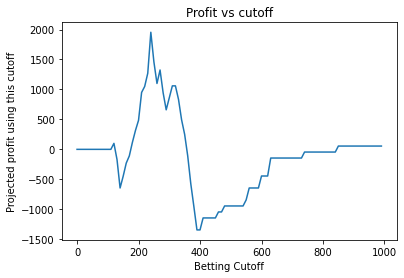

the best cutoff is: 240


In [29]:
#profit using my model (always betting on predicted winner from my model using 100 or negative odds)
cutoffs = list(range(0,1000,10))
profits = []
for cutoff in cutoffs:
    profit = 0
    for i in prediction_history.index:
        correct = prediction_history['correct?'][i]
        f_draft = prediction_history['fighter DraftKings'][i]
        o_draft = prediction_history['opponent DraftKings'][i]
        f_pred = prediction_history['predicted fighter odds'][i]
        o_pred = prediction_history['predicted opponent odds'][i]
        if min(f_draft,o_draft)>=-cutoff:
            if correct==0:
                if f_draft>=o_draft and f_pred>=o_pred: 
                    if f_draft>=0 and o_draft<=0 and f_pred>=0 and o_pred<=0: 
                        profit += o_draft
                    #else:
                        #print('outlier here')
                elif f_draft<=o_draft and f_pred>=o_pred: 
                    if f_draft<=0 and o_draft>=0 and f_pred>=0 and o_pred<=0: 
                        profit -= 100
                    #else:
                        #print('outlier here')
                if f_draft>=o_draft and f_pred<=o_pred: 
                    if f_draft>=0 and o_draft<=0 and f_pred<=0 and o_pred>=0: 
                        profit -= 100
                    #else:
                        #print('outlier here')
                elif f_draft<=o_draft and f_pred<=o_pred: 
                    if f_draft<=0 and o_draft>=0 and f_pred<=0 and o_pred>=0: 
                        profit += f_draft
                    #else:
                        #print('outlier here')
            elif correct==1:
                if f_draft>=o_draft and f_pred>=o_pred: 
                    if f_draft>=0 and o_draft<=0 and f_pred>=0 and o_pred<=0: 
                        profit += 100
                    #else:
                        #print('outlier here')
                elif f_draft<=o_draft and f_pred>=o_pred: 
                    if f_draft<=0 and o_draft>=0 and f_pred>=0 and o_pred<=0: 
                        profit += o_draft
                    #else:
                        #print('outlier here')
                if f_draft>=o_draft and f_pred<=o_pred: 
                    if f_draft>=0 and o_draft<=0 and f_pred<=0 and o_pred>=0: 
                        profit += f_draft
                    #else:
                        #print('outlier here')
                elif f_draft<=o_draft and f_pred<=o_pred: 
                    if f_draft<=0 and o_draft>=0 and f_pred<=0 and o_pred>=0: 
                        profit += 100
                    #else:
                        #print('outlier here')
    profits.append(profit)

plt.plot(cutoffs, profits)
plt.xlabel('Betting Cutoff')
plt.ylabel('Projected profit using this cutoff')
plt.title('Profit vs cutoff')
plt.show()
argmx = [i for i in range(len(profits)) if profits[i] == max(profits)][0]
print(f'the best cutoff is: {cutoffs[argmx]}')

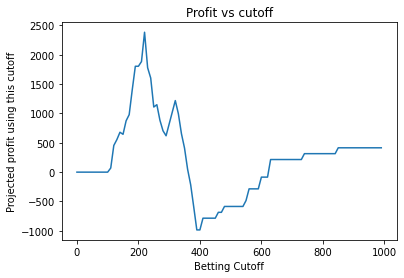

the best cutoff is: 220


In [31]:
#profit using draftkings model (always betting on predicted winner from draftkings model using 100 or negative odds)
cutoffs = list(range(0,1000,10))
profits = []
for cutoff in cutoffs:
    profit = 0
    for i in prediction_history.index:
        f_draft = prediction_history['fighter DraftKings'][i]
        o_draft = prediction_history['opponent DraftKings'][i]
        if min(f_draft,o_draft)>=-cutoff:
            fight_winner = winner(prediction_history['fighter name'][i], prediction_history['opponent name'][i])
            if f_draft>=o_draft:
                predicted_winner = prediction_history['opponent name'][i]
            else:
                predicted_winner = prediction_history['fighter name'][i]
            if same_name(predicted_winner,fight_winner):
                profit += 100
            else:
                profit += min(f_draft,o_draft)
    profits.append(profit)

plt.plot(cutoffs, profits)
plt.xlabel('Betting Cutoff')
plt.ylabel('Projected profit using this cutoff')
plt.title('Profit vs cutoff')
plt.show()
argmx = [i for i in range(len(profits)) if profits[i] == max(profits)][0]
print(f'the best cutoff is: {cutoffs[argmx]}')

In [ ]:
#build a prediction model using AI
betting_model = prediction_history[['predicted fighter odds','predicted opponent odds','fighter DraftKings','opponent DraftKings','correct?']]
    

In [ ]:
betting_model